Loading the dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/EXECiiAA/Project-2_B1/main/vgsales_10_percent.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(data.head())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


Generating Plots. For each plot it will be identified in code via the info within the #

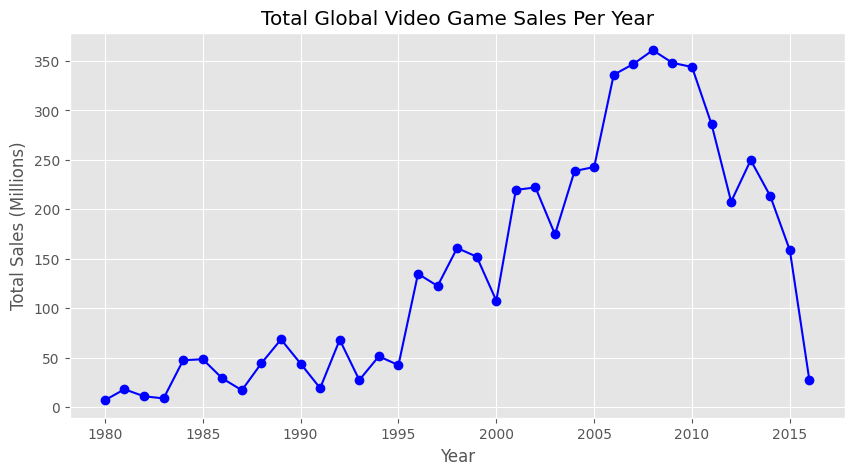

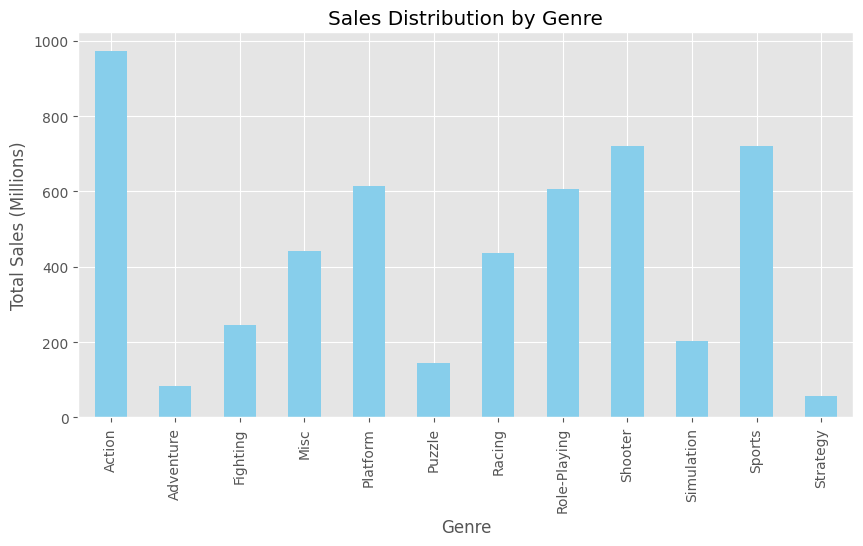

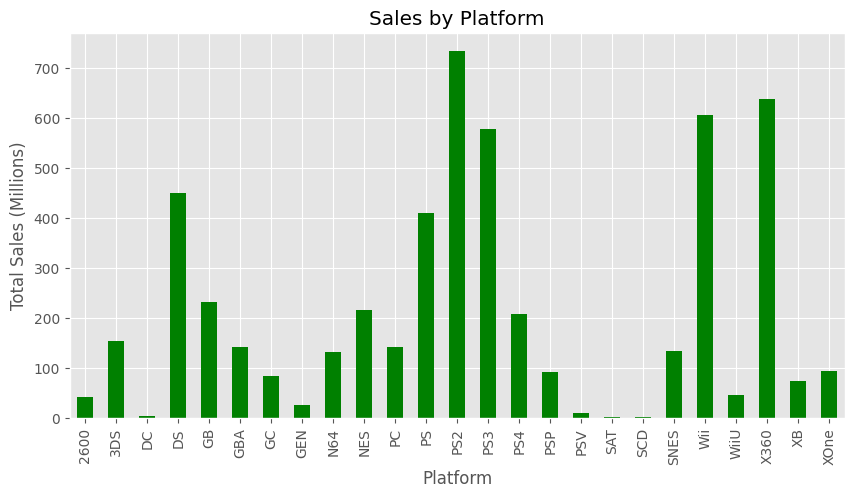

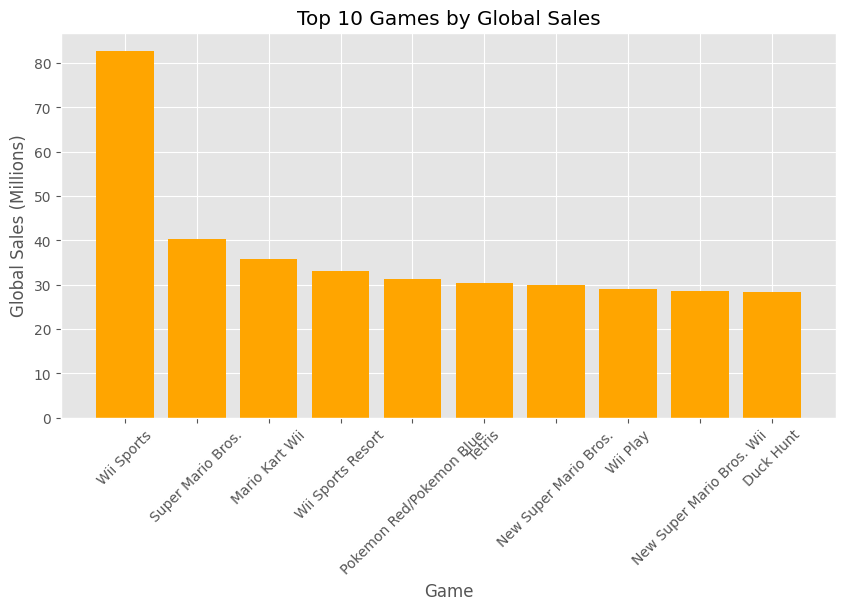

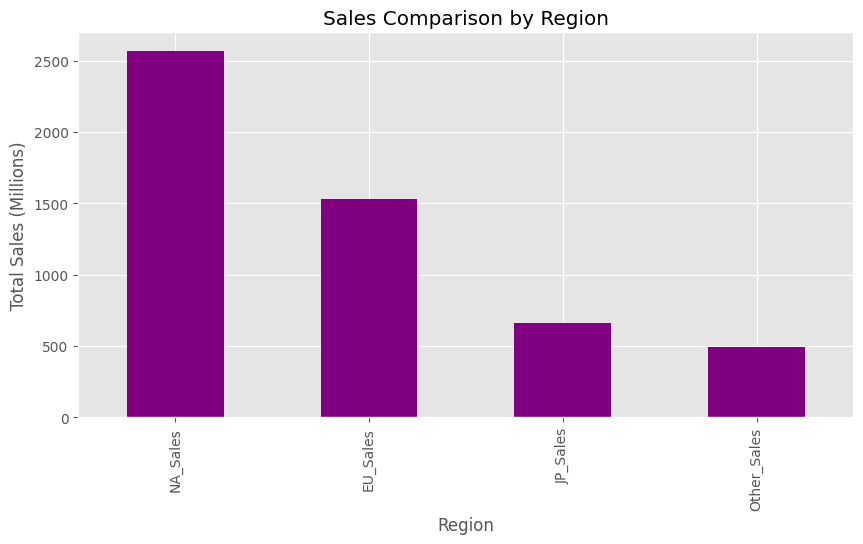

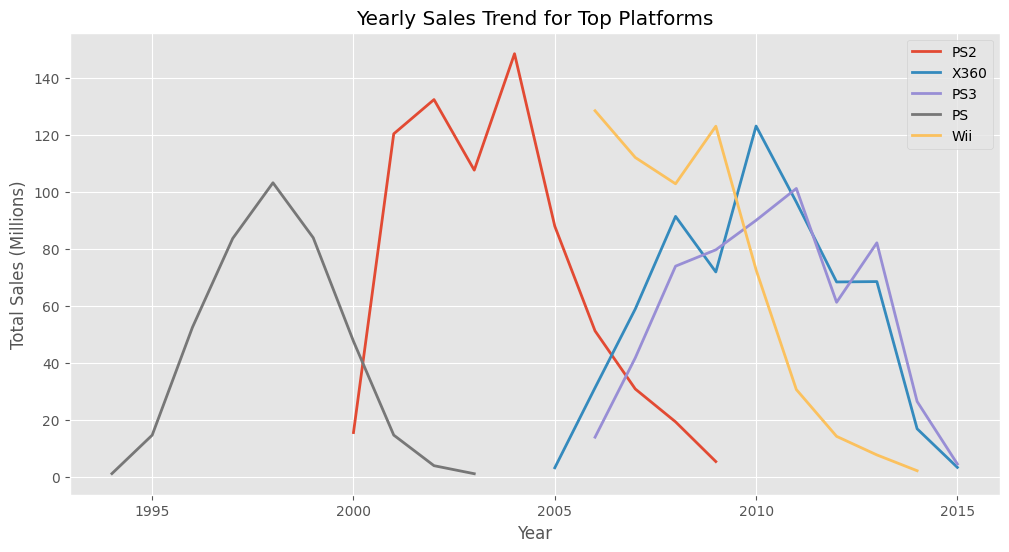

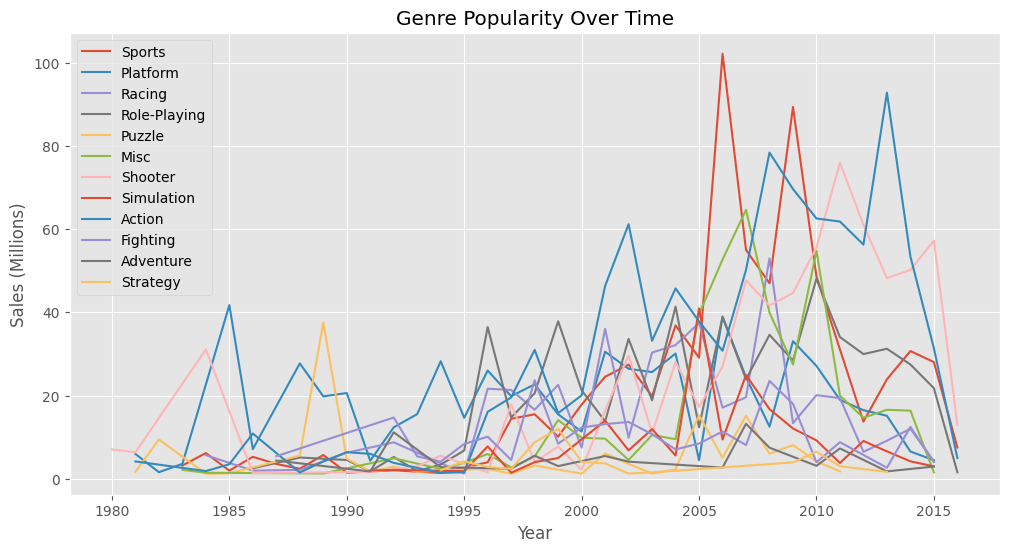

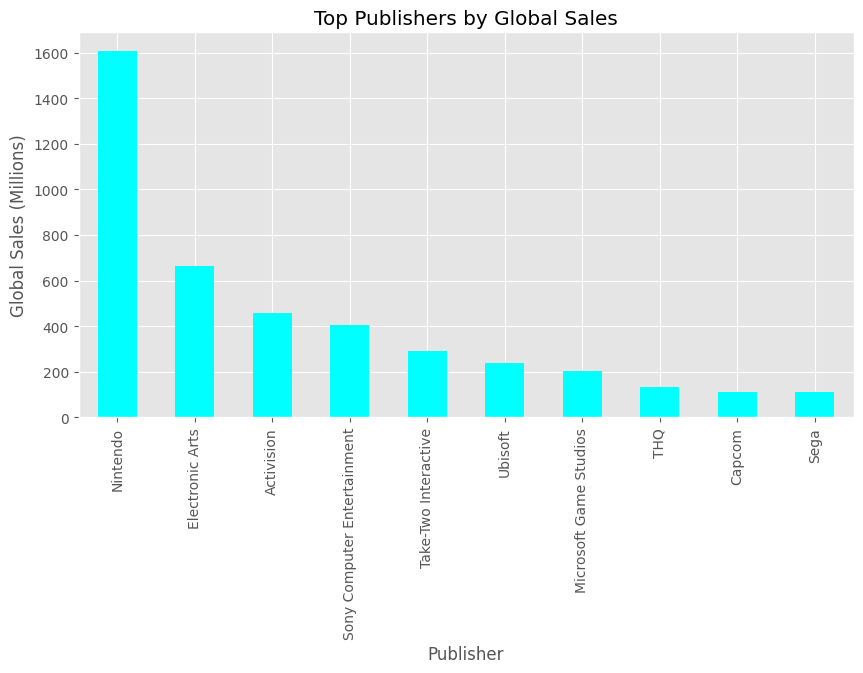

<Figure size 1200x600 with 0 Axes>

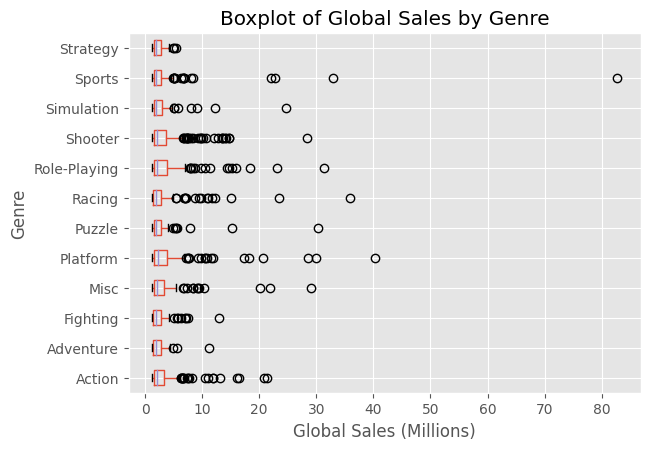

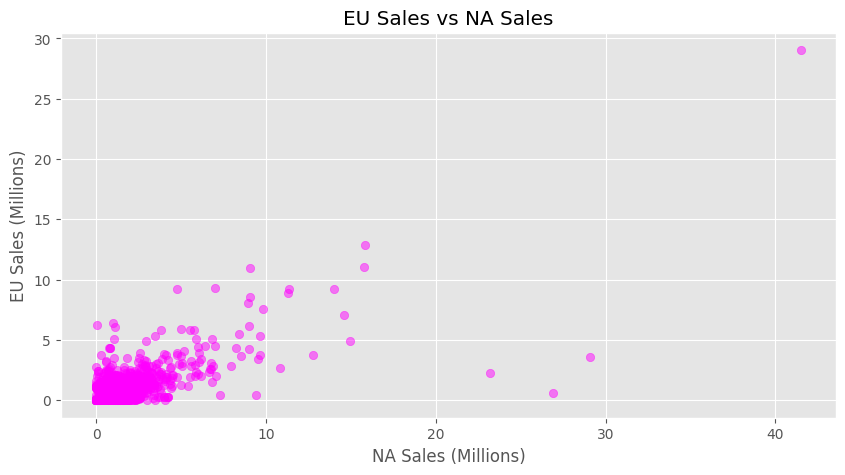

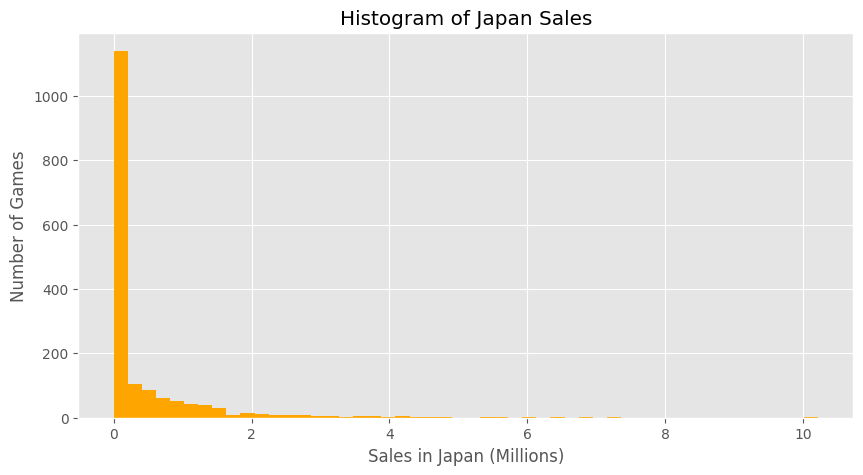

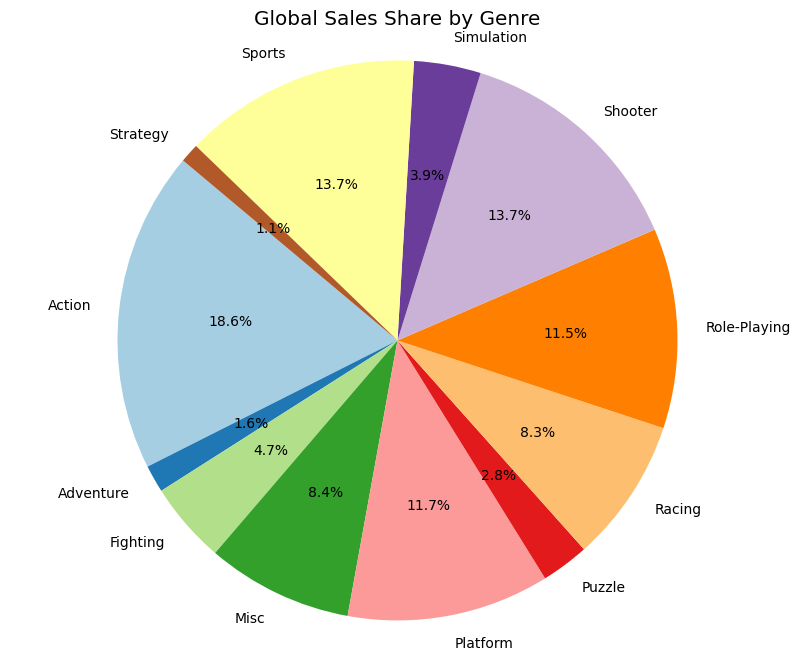

In [7]:
plt.style.use('ggplot')

# Plot 1: Total global sales per year
plt.figure(figsize=(10, 5))
data.groupby('Year')['Global_Sales'].sum().plot(kind='line', marker='o', color='b')
plt.title('Total Global Video Game Sales Per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.show()

# Plot 2: Sales distribution by genre
plt.figure(figsize=(10, 5))
data.groupby('Genre')['Global_Sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Sales Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.show()

# Plot 3: Sales by platform
plt.figure(figsize=(10, 5))
data.groupby('Platform')['Global_Sales'].sum().plot(kind='bar', color='green')
plt.title('Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (Millions)')
plt.show()

# Plot 4: Top 10 games by global sales
top_games = data.sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_games['Name'], top_games['Global_Sales'], color='orange')
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Game')
plt.xticks(rotation=45)
plt.ylabel('Global Sales (Millions)')
plt.show()

# Plot 5: Sales comparison by region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = data[regions].sum()
plt.figure(figsize=(10, 5))
region_sales.plot(kind='bar', color='purple')
plt.title('Sales Comparison by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.show()

# Plot 6: Yearly trend of sales for the top platforms
top_platforms = data['Platform'].value_counts().index[:5]
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    yearly_data = data[data['Platform'] == platform].groupby('Year')['Global_Sales'].sum()
    plt.plot(yearly_data.index, yearly_data, marker='', linewidth=2, label=platform)
plt.title('Yearly Sales Trend for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.legend()
plt.show()

# Plot 7: Genre popularity over time
plt.figure(figsize=(12, 6))
for genre in data['Genre'].unique():
    yearly_data = data[data['Genre'] == genre].groupby('Year')['Global_Sales'].sum()
    plt.plot(yearly_data.index, yearly_data, marker='', label=genre)
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().nlargest(10)
top_publishers.plot(kind='bar', color='cyan')
plt.title('Top Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (Millions)')
plt.show()

# Plot 9: Boxplot of global sales by genre
plt.figure(figsize=(12, 6))
data.boxplot(column='Global_Sales', by='Genre', vert=False)
plt.title('Boxplot of Global Sales by Genre')
plt.xlabel('Global Sales (Millions)')
plt.suptitle('')  # Suppress the automatic suptitle to clean up the title area
plt.show()

# Plot 10: Scatter plot of EU Sales vs NA Sales
plt.figure(figsize=(10, 5))
plt.scatter(data['NA_Sales'], data['EU_Sales'], alpha=0.5, color='magenta')
plt.title('EU Sales vs NA Sales')
plt.xlabel('NA Sales (Millions)')
plt.ylabel('EU Sales (Millions)')
plt.show()

# Plot 11: Histogram of Japan Sales
plt.figure(figsize=(10, 5))
plt.hist(data['JP_Sales'], bins=50, color='orange')
plt.title('Histogram of Japan Sales')
plt.xlabel('Sales in Japan (Millions)')
plt.ylabel('Number of Games')
plt.show()

# Plot 12: Pie chart of global sales share by genre
plt.figure(figsize=(10, 8))
genre_sales = data.groupby('Genre')['Global_Sales'].sum()
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(genre_sales))))
plt.title('Global Sales Share by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()